# Image feature detection -- MNIST

Logistic Regression to predict digit labels based on images. The image above shows a bunch of training digits (observations) from the MNIST dataset whose category membership is known (labels 0–9). After training a model with logistic regression, it can be used to predict an image label (labels 0–9) given an image.
For full description refer to link below.

Like in any non trivial business cases the final proposed approach may required some investigations. In many cases selected solution wll need to be tested.

Use Case: In many situations extrat features from images are important business process to support automation and detection of related inferences, such: anomalies detectation, risk accessement,  and labeling images based on fix set of categories(Male/female, boot/shoes, car/truck/van, 1/2/3/, etcs)

A propose FP will to research the possible ways to train and optimize a range of models on the MNIST dataset. The Dataset was pre-processed and it is widely use as example ingestion data for many ML pipelines.

Before start your final project, please review this article in detail, where you will have a simple to run image classifier.  The questions below will be all related to related learnig objectives.
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# Data Ingestion

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

Few topics to explore and suggest possible enhancements.
Ingestion and data preparation: What are possible enhancements to the data collection? Use the colors, larger images?, please explore how you could propose the creation of such data set?

In [10]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


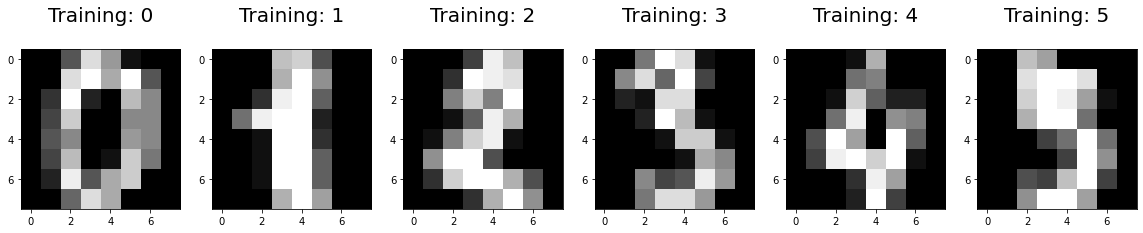

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

# Fitting a ML algorithm 

In [14]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HgMercury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [16]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [17]:
#Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

# ML Validation

In [18]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


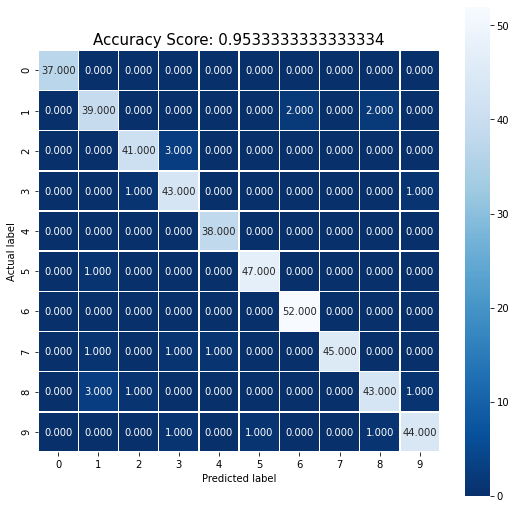

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [22]:
def inspect_performance(model, train_images, train_labels, test_images, test_labels, ypred):
    "Prints training performance, test performance and a performance report"
    print("Training score: ", model.score(train_images,train_labels))
    print("Test score: ", model.score(test_images,test_labels))
    print("Test report: ")
    print(metrics.classification_report(ypred, test_labels))
inspect_performance(logisticRegr, x_train, y_train, x_test, y_test, predictions)  

Training score:  0.9962880475129918
Test score:  0.9533333333333334
Test report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.89      0.90        44
           2       0.93      0.95      0.94        43
           3       0.96      0.90      0.92        48
           4       1.00      0.97      0.99        39
           5       0.98      0.98      0.98        48
           6       1.00      0.96      0.98        54
           7       0.94      1.00      0.97        45
           8       0.90      0.93      0.91        46
           9       0.94      0.96      0.95        46

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



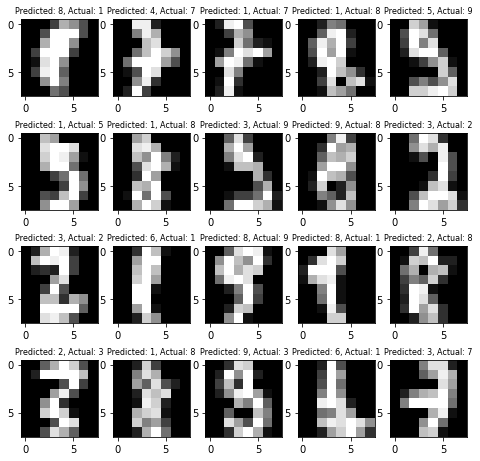

In [29]:
# Inspecting Misclassified Images

import numpy as np 
import matplotlib.pyplot as plt

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index = index + 1

# Plot the test results

plt.figure(figsize=(8,8))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
    plt.subplot(4, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 8)

# Final Project Questions

1- Provide a list of viable ML algorithms from the URLs provided, and explain the pros and cons of 2 of them

2- What are the digits that are causing distinctive miss-classification? How to detect them? Any suggestions? 

3- Find an article not listed here that uses other AI/ML algorithms and write a short summary about it. ( 300-500 words)

4- Please read this article about hyperparameters.
Describe what the features are, and how many of them. (Y/X)?
https://towardsdatascience.com/from-zero-to-hero-in-xgboost-tuning-e48b59bfaf58

5- Please summarise in a short sentence your interpretation of the best confusion matrix of this article. ( < 100 words)
https://www.kaggle.com/antonk/mnist-trying-and-tuning-different-models#Model-1:-SVM

6- Please change the code in line 8 to print 6 training samples and display numbers 0-5
